## Setup

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os 
import shutil

## Police Data Cleaning

In [2]:
df = pd.read_csv('Mapping Police Violence-Grid view.csv')
mpv = df[['cause_of_death','race','date','officer_charged','allegedly_armed']]
#renaming "allegedly_armed" to "armed"
mpv = mpv.rename(columns={'allegedly_armed': 'armed'})
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,3/14/2022,NaN,Allegedly Armed
1,NaN,White,3/12/2022,NaN,Allegedly Armed
2,Gunshot,White,3/12/2022,No Known Charges,Allegedly Armed
3,Gunshot,NaN,3/12/2022,No Known Charges,Allegedly Armed
4,Gunshot,White,3/11/2022,No Known Charges,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,1/1/2013,No Known Charges,Unclear
10071,Gunshot,Black,1/1/2013,No Known Charges,Allegedly Armed
10072,Gunshot,White,1/1/2013,No Known Charges,Allegedly Armed
10073,Gunshot,Hispanic,1/1/2013,No Known Charges,Allegedly Armed


In [3]:
print(mpv['race'].unique())
print(mpv['cause_of_death'].unique())
print(mpv['armed'].unique())

['Black' 'White' nan 'Hispanic' 'Non-white' 'Unknown race'
 'Pacific Islander' 'Native American' 'Asian']
[nan 'Gunshot' 'Vehicle' 'Gunshot,Taser' 'Other'
 'Physical Restraint,Beaten' 'Taser' 'Beaten' 'Physical Restraint'
 'Taser,Physical Restraint' 'Gunshot,Vehicle' 'Chemical Agent' 'Bean bag'
 'Pepper Spray' 'Asphyxiated' 'Bomb']
['Allegedly Armed' 'Unarmed/Did Not Have Actual Weapon' nan 'Unclear'
 'Vehicle']


In [4]:
mpv['armed'].value_counts()

Allegedly Armed                       7185
Unarmed/Did Not Have Actual Weapon    1329
Unclear                                912
Vehicle                                635
Name: armed, dtype: int64

In [5]:
mpv['cause_of_death'].value_counts()
#proportion of gunshot vs taser, assign to gunshot then

Gunshot                      9312
Taser                         292
Gunshot,Taser                 287
Vehicle                        59
Physical Restraint             53
Beaten                         33
Asphyxiated                     9
Other                           7
Pepper Spray                    5
Taser,Physical Restraint        4
Gunshot,Vehicle                 2
Bean bag                        2
Physical Restraint,Beaten       1
Chemical Agent                  1
Bomb                            1
Name: cause_of_death, dtype: int64

In [6]:
print(mpv['officer_charged'].unique())

[nan 'No Known Charges' 'Charged with vehicular homicide'
 'Charged with a crime' '"Charged, Charges Dropped"'
 '"Charged, Convicted of Manslaughter"'
 '"Charged, Convicted, Sentenced to 22.5 years in prison"'
 '"Charged, Convicted"'
 '"Charged, Convicted, Sentenced to life in prison"'
 '"Charged, Convicted, Sentenced to 10 years in prison"'
 '"Charged, Convicted, Sentenced to 7 years in prison"'
 '"Charged, Acquitted"'
 '"Charged, Plead Guilty to Voluntary Manslaughter"'
 '"Charged, Convicted, Sentenced to 1 year in prison and 4 years probation"'
 '"Charged, Convicted, Sentenced to 25 years in prison"'
 '"Charged, Convicted, Sentenced to 2 years suspension and 3 years probation"'
 '"Charged, Convicted, Sentenced to 5-15 years in prison"'
 '"Charged, Convicted, Sentenced to 4.75 years in prison"'
 '"Charged, Mistrial"'
 '"Charged, Convicted, Sentenced to 15 years in prison"'
 '"Charged, Plead No Contest, Sentenced to 10 years probation"'
 '"Charged, Convicted, Sentenced to 6 years in p

In [7]:
#cleaning "officer_charged"

mpv['officer_charged'] = mpv['officer_charged'].astype(str)

mpv.loc[mpv['officer_charged'].str.contains('Charged') == True, "officer_charged"] = "Charged"
mpv.loc[mpv['officer_charged'] == 'No Known Charges', 'officer_charged'] = "Not Charged"
mpv.loc[mpv['officer_charged'] == 'nan', 'officer_charged'] = "Unknown"
mpv

,cause_of_death,race,date,officer_charged,armed
0,NaN,Black,3/14/2022,Unknown,Allegedly Armed
1,NaN,White,3/12/2022,Unknown,Allegedly Armed
2,Gunshot,White,3/12/2022,Not Charged,Allegedly Armed
3,Gunshot,NaN,3/12/2022,Not Charged,Allegedly Armed
4,Gunshot,White,3/11/2022,Not Charged,Allegedly Armed
...,...,...,...,...,...
10070,Gunshot,Hispanic,1/1/2013,Not Charged,Unclear
10071,Gunshot,Black,1/1/2013,Not Charged,Allegedly Armed
10072,Gunshot,White,1/1/2013,Not Charged,Allegedly Armed
10073,Gunshot,Hispanic,1/1/2013,Not Charged,Allegedly Armed


In [8]:
print(mpv['officer_charged'].unique())
type(mpv['officer_charged'].iloc[0])

['Unknown' 'Not Charged' 'Charged']


str

In [9]:
print(mpv['officer_charged'].unique())

['Unknown' 'Not Charged' 'Charged']


In [10]:
mpv.dtypes
#probably nan

cause_of_death     object
race               object
date               object
officer_charged    object
armed              object
dtype: object

In [11]:
#why the heck is it object and not int

## Variables

### Cause of Death

Variable name: cause_of_death

Data type: string

Lists cause of death of police victims. Includes: NaN, gunshot, vehicle, taser, beaten, physical restraint, chemical agent, bean bag, pepper spray, asphyxiated, bomb, or multiple causes.

### Victim's Race

Variable name: race

Data type: string

Race of police victim, includes NaN, Black, White, Hispanic, Non-white, Unknown race, Pacific Islander, Native American, or Asian

### Date of Encounter

Variable name: date

Data type: pandas Timestamp

Dates from 1/1/2013 to 10/1/2020 (MM/DD/YY)

### Officer Charged

Variable name: officer_charged

Data type: string

Whether or not the police officer responsible for violence any criminal or civil charges.

### Victim Armed

Variable name (in original date): allegedly_armed

Variable name (in our data): armed

Data type: int

Whether or not victim was armed.
If unarmed (0), armed (1), unclear (3) otherwise (NaN).

## EDA

### Overview

### Officer Charged

We can start by looking at the data in the Officer Charged column to see some general statistics. Since the data is categorical, numerical analysis within this column is limited.

In [12]:
mpv['officer_charged'].value_counts()

Not Charged    9779
Charged         185
Unknown         111
Name: officer_charged, dtype: int64

As we can see, the officers were only charged in 185 cases, which is only 1.84% of all cases. Officers did not face any charges in 9779 cases, which represents 98.16% of cases.

We can look at the breakdown of when officers were charged grouped by the race of the victim:

In [13]:
# Temporarily adding a count column to help in making the pivot table. This will be dropped later.
mpv['count'] = 1
oc_by_race = mpv.groupby(['officer_charged', 'race']).count()
oc_by_race

cause_of_death  date  armed  count
officer_charged race                                                
Charged         Asian                          3     3      3      3
                Black                         84    84     84     84
                Hispanic                      23    23     23     23
                Native American                3     3      3      3
                Pacific Islander               3     3      3      3
                Unknown race                   1     1      1      1
                White                         68    68     68     68
Not Charged     Asian                        140   140    140    140
                Black                       2413  2413   2413   2413
                Hispanic                    1755  1756   1756   1756
                Native American              136   136    136    136
                Pacific Islander              57    57     57     57
                Unknown race                 979   979    979    979
                White                       4291  4292   4292   4292
Unknown         Black                         16    17     16     17
                Hispanic                      12    12     10     12
                Non-white                      1     1      1      1
                Unknown race                   5     5      4      5
                White                         21    24     20     24

In [14]:
obr_pvt_table = oc_by_race.pivot_table(index=['race'], columns='officer_charged', values='count', fill_value=0, aggfunc=np.sum)
obr_pvt_table['Prop. Charged'] = 100 * obr_pvt_table['Charged'] / (obr_pvt_table['Charged'] + obr_pvt_table['Not Charged'] + obr_pvt_table['Unknown'])
obr_pvt_table

officer_charged,Charged,Not Charged,Unknown,Prop. Charged
race,,,,
Asian,3,140,0,2.097902
Black,84,2413,17,3.341289
Hispanic,23,1756,12,1.284199
Native American,3,136,0,2.158273
Non-white,0,0,1,0.000000
Pacific Islander,3,57,0,5.000000
Unknown race,1,979,5,0.101523
White,68,4292,24,1.551095


We can graph this data in a stacked bar chart:

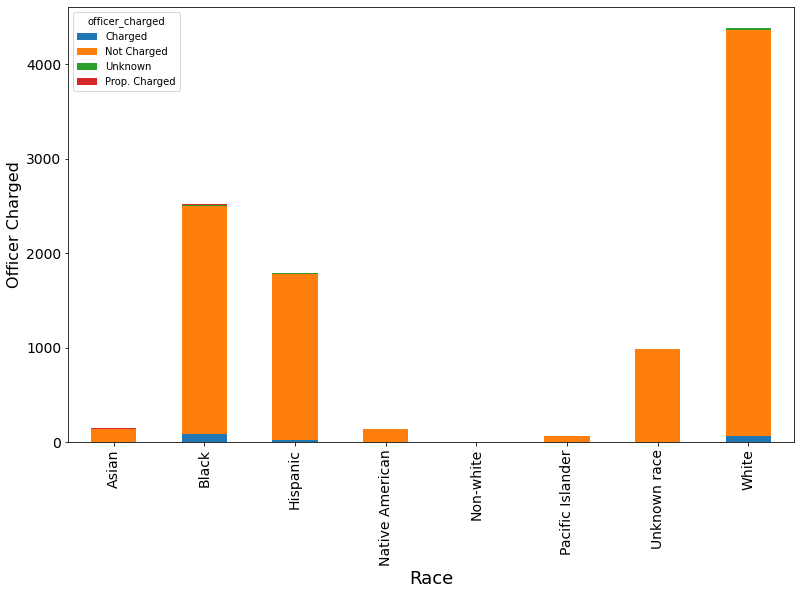

In [38]:
obr_pvt_table.plot.bar(figsize=(13,8), stacked=True)

plt.ylabel('Race', fontsize=18)
plt.xlabel('Officer Charged', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# Not very useful due to small quantities

In [20]:
if 'count' in mpv.columns:
    mpv.drop('count', axis=1, inplace=True)

We can see how the Officer Charged variable behaves in comparison to changes in other variables to find any trends in the data.

## Twitter Data

We need to combine the multiple csv folders of tweet ids into one big one to then randomlly select tweets to hydrate.

In [17]:
def flatten(directory):
    for dirpath, _, filenames in os.walk(directory, topdown=False):
        for filename in filenames:
            i = 0
            source = os.path.join(dirpath, filename)
            target = os.path.join(directory, filename)

            while os.path.exists(target):
                i += 1
                file_parts = os.path.splitext(os.path.basename(filename))

                target = os.path.join(
                    directory,
                    file_parts[0] + "_" + str(i) + file_parts[1],
                )

            shutil.move(source, target)

            print("Moved ", source, " to ", target)

        if dirpath != directory:
            os.rmdir(dirpath)

            print("Deleted ", dirpath)

#credit to: https://amitd.co/code/python/flatten-a-directory

In [18]:
flatten(os.path.dirname("/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/twitter"))

Flattened all folders to make combining into one CSV easier.

In [19]:
tweets_path = "/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/"
file_list = [tweets_path + f for f in os.listdir(tweets_path)]
csv_list = []

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/'

In [ ]:
for file in sorted(file_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

csv_merged = pd.concat(csv_list, ignore_index=True)
csv_merged.to_csv(tweets_path + 'tweets_full.csv', index=False)

Tweet IDs successfully merged into one big CSV ready to be permutated.

In [ ]:
tweets = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_full.csv')
tweets.head()

In [ ]:
tweets_sample = tweets.sample(n = 2000000)
tweets_sample.head()

Randomly selected 2,000,000 tweet IDs. Now, we need to export back to CSV file with just the IDs to hydrate the tweets.

In [ ]:
tweets_sample_id = tweets_sample['status_id']

In [ ]:
tweets_sample_id.to_csv('/Users/dmusa/Documents/UCSD/2021-2022/Tweets_BLM/tweets_sample_id.csv', header=False, index=False)

Now that we have the tweets, let's go over the variables in the dataframe. 

The creators of the dataset categorized each tweet as supporting one of three major movements: Black Lives Matter, All Lives Matter, and Blue Lives Matter. The tweets are one hot encoded. 

The used an assortment of keywords and hashtags, as shown below, to categorize the tweets. These terms have a weight. The weight indicates how unique a term is to the topic. So a "1.0" tells us this term showed up only in that topic.

In [ ]:
alm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/alm50.csv')
alm = alm[['term', 'weight']]
alm.sort_values(by=['weight'],ascending=False)
alm.loc[alm['weight'] == 1.0]

In [ ]:
blm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blm100.csv')
blm = blm[['term', 'weight']]
blm.head()
blm.loc[blm['weight'] == 1.0]

In [ ]:
blulm = pd.read_csv('/Users/dmusa/Documents/UCSD/2021-2022/BLM_Tweets/topics/blulm25.csv')
blulm = blulm[['term', 'weight']]
blulm.head()
blulm.loc[blulm['weight'] == 1.0]